<a href="https://colab.research.google.com/github/AakashPaul/Dominant-Color-Extraction-And-Image-Segmentation/blob/master/codingblockstockpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--> Importing necessary files and libraries


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
x = pd.read_csv("x_train.csv")
y = pd.read_csv("y_train.csv")
xt = pd.read_csv("x_test.csv")
x=np.array(x)
y=np.array(y)
xt=np.array(xt)

In [0]:
x.shape

(1257, 1)

In [0]:
y

array([[333.87],
       [330.75],
       [328.77],
       ...,
       [794.23],
       [785.93],
       [782.78]])

--> Visualising the given Dataset of stock prices of the company of about 1200 days

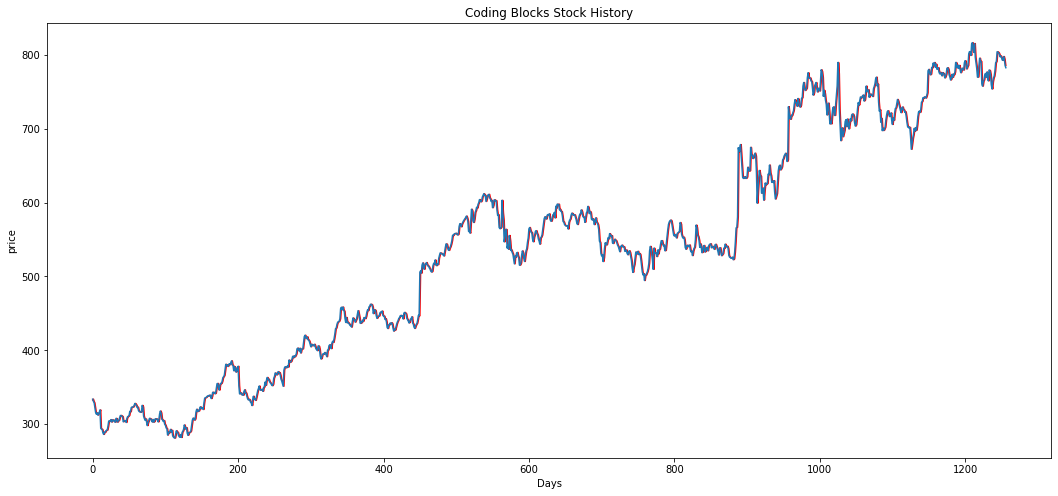

In [0]:
plt.rcParams["figure.figsize"] = (18,8)
plt.title('Coding Blocks Stock History')
plt.ylabel('price')
plt.xlabel('Days')
plt.plot(x , color="red")
plt.plot(y)
plt.show()

--> Some Data Featuring

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
x_scaled=sc.fit_transform(x)

In [0]:
x_scaled

array([[0.09640129],
       [0.09834351],
       [0.09251685],
       ...,
       [0.96485331],
       [0.95807422],
       [0.94257381]])

--> Getting Data ready to be fed to the RNNs

In [0]:
X_train = []
y_train = []
for i in range(60, len(x)):
    X_train.append(x_scaled[i-60:i, 0])
    y_train.append(x_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
X_train.shape

(1197, 60)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

--> Creating the RNN model

In [0]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
1197/1197 [==============================] - 11s 10ms/step - loss: 0.0542
Epoch 2/25
1197/1197 [==============================] - 8s 7ms/step - loss: 0.0067
Epoch 3/25
1197/1197 [==============================] - 8s 6ms/step - loss: 0.0057
Epoch 4/25
1197/1197 [==============================] - 8s 6ms/step - loss: 0.0054
Epoch 5/25
1197/1197 [==============================] - 8s 6ms/step - loss: 0.0051
Epoch 6/25
1197/1197 [==============================] - 8s 6ms/step - loss: 0.0050
Epoch 7/25
1197/1197 [==============================] - 8s 6ms/step - loss: 0.0049
Epoch 8/25
1197/1197 [==============================] - 8s 6ms/step - loss: 0.0048
Epoch 9/25
1197/1197 [==============================] - 8s 6ms/step - loss: 0.0047
Epoch 10/25
1197/1197 [==============================] - 8s 6ms/step - loss: 0.0044
Epoch 11/25
1197/1197 [==============================] - 8s 6ms/step - loss: 0.0043
Epoch 12/25
1197/1197 [==============================] - 8s 7ms/step - loss: 0.0045

--> Data featuring for test set

In [0]:
xt = np.concatenate((x[1196:1256],xt), axis=0)

In [0]:
xt.shape

(79, 1)

In [0]:
xt_scaled=sc.fit_transform(xt)

In [0]:
xt_scaled = np.reshape(xt_scaled, (xt_scaled.shape[0], xt_scaled.shape[1], 1))

In [0]:
xtest=[]
for i in range(60, 80):
    xtest.append(xt_scaled[i-60:i, 0])

In [0]:
xtest = np.array(xtest)

In [0]:
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))

--> Fitting the model to the dataset

In [0]:
predicted_stock_price = regressor.predict(xtest)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [0]:
predicted_stock_price

array([[795.64954],
       [796.2675 ],
       [796.43964],
       [796.27405],
       [796.0015 ],
       [795.8567 ],
       [795.9973 ],
       [796.48267],
       [797.2866 ],
       [798.36566],
       [799.61597],
       [800.9121 ],
       [802.17126],
       [803.3162 ],
       [804.4161 ],
       [805.6041 ],
       [807.07   ],
       [808.9538 ],
       [811.3266 ],
       [813.9058 ]], dtype=float32)

In [0]:
df=pd.DataFrame(predicted_stock_price,)

--> Predicted stock prices for the next 20 days.

In [0]:
df

,0
0,795.649536
1,796.267517
2,796.439636
3,796.274048
4,796.001526
5,795.856689
6,795.997314
7,796.482666
8,797.286621
9,798.365662


In [0]:
csv_data = df.to_csv("export.csv")